# Beta

## Finding $ \beta$
  
 $\beta$ in statistical terms is the slope of the least squares regression line of the daily returns of the stock market versus the daily returns of the specific stock we are looking for. What $\beta$ tells you is for a one percentage increase of the stock market, you will get an increase of $\beta$% in that specific stock. For the sake of this example we will be using Ford as our particular stock. Beta is a measure of volatility, which is good for seeing how stock prices change with the stock market.

A positive $\beta$ means that both the particular stock and the stock market move in the same direction, however a negative $\beta$ shows a stock that moves in the opposite direction, something that you might want in your portfolio to hedge your position. Gold tends to have a negative beta in relation to the stock market because people invest more in gold when the market starts to get bearish.


 $\beta$ Is measured by taking the covariance of the daily returns of the stock market and the Ford divided over the variance of the return of the stock market. Here is the formula for $\beta$.
 
 $$ \beta = \frac{Cov(R_m, R_T)}{Var(R_m)}$$ 

In which $R_T$ is the daily return percentage of Ford and $R_m$ the return percentage of the S&P 500.


We are first going to find beta using the formula mentioned above, and afterwards we are going to use a linear regression to calculate beta.

In order to find $\beta$ in python we are going to load the following python libraries:



In [71]:
#For plotting
import matplotlib.pyplot as plt
from matplotlib import style

#For Data Wrangling
import numpy as np

We are going to load stock data using the module we made last time which was the stock reader. We are going to call our code using the magic command called `%load`.

In [11]:
# %load "C:\Users\sespejog\OneDrive\Data Analysis\Finance and Economics\final_stock_reader.py"
"""
Created on Wed Jul 10 14:59:12 2019

@author: sespejog
"""
import pandas as pd 
import datetime as dt 
import pandas_datareader as web
def start_date(year,month,day):
    '''returns a datetime object of the input'''
    return dt.datetime(year,month,day).date()
#beginning=start_date(2000,1,1)
def rename_col(company,df):
    '''renames a dataframe columns with its company ticker'''
    return {i:"{0:} {1:}".format(i,company) for i in df.columns}
def load_stock(company,start):
    '''enter a company's name and the first date of stock data
    returns until present day'''
    end=pd.to_datetime("today").date()
    Stock_Data=web.DataReader(company,"yahoo",start,end)
    Stock_Data=Stock_Data.rename(index=str, columns=rename_col(company,Stock_Data))
    Stock_Data["Daily Return {:}".format(company) ]=(Stock_Data["Adj Close {:}".format(company)]-Stock_Data["Adj Close {:}".format(company)].shift(1))/Stock_Data["Adj Close {:}".format(company)].shift(1)
    Stock_Data.index=pd.to_datetime(Stock_Data.index)
    return Stock_Data

#competitors=["FSS","F","GM","HMC","NAV","OSK","REVG","TTM","TM","WBC"]
#autos_nyse={i:load_stock(i,beginning) for i in competitors}



In [19]:
company="F"
start="2010-01-01"
df=load_stock(company,start)
df.index=pd.to_datetime(df.index) #this is how we remove the minutes-hours-seconds

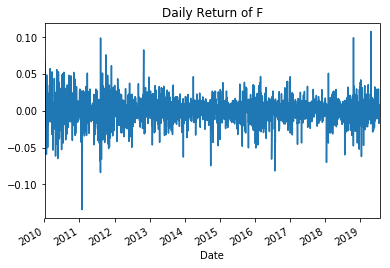

In [18]:
%matplotlib inline
df["Daily Return {:}".format(company)].plot(title="Daily Return of {:}".format(company))


In [12]:
print("This is the daily return for {:}. Next We find the daily return for the S&P 500".format(company))

This is the daily return for F. Next We find the daily return for the S&P 500


In [20]:
stock_market="SPY"
df_stock_market =load_stock(stock_market,start)

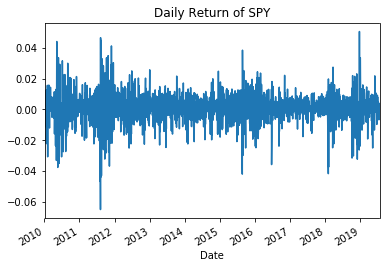

In [21]:
df_stock_market["Daily Return {:}".format(stock_market)].plot(title="Daily Return of {:}".format(stock_market))

This is the daily return of the S&P 500.

### Finding the covariance 



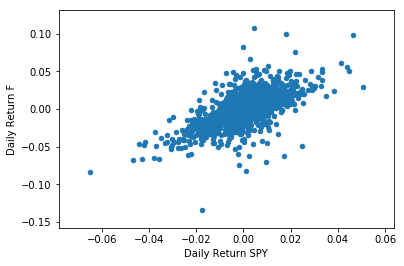

In [23]:
merged=pd.concat([df,df_stock_market],axis=1,join_axes=[df_stock_market.index])
merged=merged.dropna()
merged.plot.scatter(x="Daily Return {:}".format(stock_market),y="Daily Return {:}".format(company))

This scatter plot shows that there is some relation between the movements of the stockmarket and the movements of Ford. Notice how the the middle cluster of the data looks like a stretched out football? This is what we expect to see when there is no underlying pattern. This topic will be covered in another notebook.

Since we are going to start using inferential statistics we are going to check if our Daily return data is normally distributed.

Number of observations for SPY = (2403,)
Number of observations for F = (2403,)


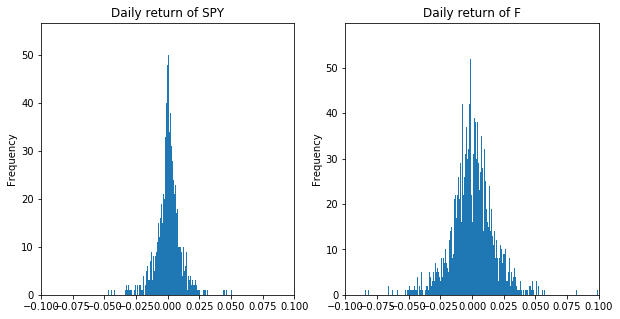

In [77]:
import matplotlib as matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5] #this creates the subplots
fig, axs = plt.subplots(1,2)
merged["Daily Return {:}".format(stock_market)].plot.hist(bins=500,ax=axs[0],title="Daily return of {:}".format(stock_market),xlim=(-0.1,0.1))
merged["Daily Return {:}".format(company)].plot.hist(bins=500,ax=axs[1],title="Daily return of {:}".format(company),xlim=(-0.1,0.1))
print("Number of observations for {:} =".format(stock_market),merged["Daily Return {:}".format(stock_market)].shape)
print("Number of observations for {:} =".format(company),merged["Daily Return {:}".format(company)].shape)

Something important to notice is that even though the graph in the right seems to have more data points, the fact is that they each have the same number of observations. The variance for the S&P 500 is much smaller than the variance for Ford. This will not matter much right now, the most important thing to note that is the distribution for both graphs are unimodal and approximately normal, meaning that we will be able to perform inferential statistics on our data.

#### Covariance and Variance Values 

We are going to use numpy's covariance function `numpy.cov` to get a matrix of variance values which give you the corresponding variances. This matrix contains the variance for the stock market, Ford, and the covariance of both of our graphs.
$ X_{ij}$ gives you the Variance of the i row with the corresponding j column which happen to be made out of our two columns of the daily return of Ford (F) and the S&P 500 respectively. 

In [79]:
cov=np.cov(merged["Daily Return {:}".format(stock_market)],merged["Daily Return {:}".format(company)])
print(cov)##This is the covariance matrix
var_of_stock_market=cov[0][0]
covar=cov[0][1]
print(var_of_stock_market)

[[8.65420768e-05 1.05697859e-04]
 [1.05697859e-04 3.07266828e-04]]
8.654207679489381e-05


Now that we have all the values we compute $\beta$

In [80]:
beta=covar/var_of_stock_market
print("beta is equal to {0:.4f}".format(beta))

beta is equal to 1.2213


## Checking Our Results Using Linear Regression

We are going to use a linear regression line to compare the results.

In [29]:
#For statistical tools
import statsmodels.api as sm

Statsmodel will contain the libraries necessary to create a simple linear regeression model. We will need to specify the X value and the Y value as well as if we want ain intercept or not.

In [31]:
X=sm.add_constant(merged["Daily Return {:}".format(stock_market)])
Y=merged["Daily Return {:}".format(company)]
model=sm.OLS(Y,X).fit()
model.summary()

C:\Users\sespejog\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Daily Return F   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1740.
Date:                Tue, 23 Jul 2019   Prob (F-statistic):          1.88e-286
Time:                        09:56:24   Log-Likelihood:                 6963.0
No. Observations:                2403   AIC:                        -1.392e+04
Df Residuals:                    2401   BIC:                        -1.391e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004      0.000     -1.308      0.191      -0.001       0.000
Daily Return SPY     1.2213      0.029     41.709      0.000       1.164       1.279
==============================================================================
Omnibus:                      403.240   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7442.165
Skew:                          -0.155   Prob(JB):                         0.00
Kurtosis:                      11.616   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking back on $\beta$

As it turns out the slope of the regression line matches perfectly with our equation above. There are many ways of getting $\beta$. 

Although beta is very useful when it comes to finding how volatility affects different stocks it does not tell us if the volatility of the stocks changes when the stock market returns are negative or when they are positive. This is very important to know because you might have a stock that returns a higher negative yield when the stock market returns a small negative yield and it might give you a small return when the stock market gives you a bigger return. 

In order to find out how a stock reacts to negative swings in the stock market as well as positive returns, we can disaggregate our data to find out this information. In order to do so we will divide our data in two. The first half of our data will only include the days in which the return in the stock market is negative. And the second group will include the returns of the stock market when the return is positive or did not change. We will then run a regression model just how we did before but for our two separate groups.

In [35]:
merged0=merged[merged["Daily Return {:}".format(stock_market)]<0]
merged0.sample(5)

,High F,Low F,Open F,Close F,Volume F,Adj Close F,Daily Return F,High SPY,Low SPY,Open SPY,Close SPY,Volume SPY,Adj Close SPY,Daily Return SPY
Date,,,,,,,,,,,,,,
2011-04-05,15.810000,15.55,15.650000,15.790000,72322800.0,11.273113,0.015434,133.830002,132.940002,133.000000,133.240005,120791500.0,112.782104,-0.000150
2017-11-15,12.030000,11.87,11.970000,12.000000,28441300.0,10.604712,-0.001664,257.220001,255.630005,256.619995,256.440002,80811500.0,248.075409,-0.005005
2014-12-09,15.430000,14.75,15.050000,15.430000,23382800.0,11.891891,0.000000,206.600006,203.910004,204.369995,206.470001,125180100.0,187.853134,-0.000678
2011-08-04,11.510000,10.77,11.490000,10.860000,153368800.0,7.753389,-0.067811,124.620003,120.059998,124.419998,120.260002,520721800.0,102.299736,-0.046841
2013-08-14,17.059999,16.85,17.040001,16.889999,29255700.0,12.538391,-0.009965,169.800003,168.699997,169.529999,168.740005,79829200.0,149.865768,-0.005129


In [36]:
merged0=merged[merged["Daily Return {:}".format(stock_market)]<0]
X=sm.add_constant(merged0["Daily Return {:}".format(stock_market)])
Y=merged0["Daily Return {:}".format(company)]
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Daily Return F   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     591.0
Date:                Tue, 23 Jul 2019   Prob (F-statistic):          4.26e-104
Time:                        09:58:10   Log-Likelihood:                 3119.1
No. Observations:                1061   AIC:                            -6234.
Df Residuals:                    1059   BIC:                            -6224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.691e-05      0.001      0.089      0.929      -0.001       0.001
Daily Return SPY     1.2910      0.053     24.311      0.000       1.187       1.395
==============================================================================
Omnibus:                      214.041   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3115.877
Skew:                          -0.479   Prob(JB):                         0.00
Kurtosis:                      11.341   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
merged1=merged[merged["Daily Return {:}".format(stock_market)]>=0]
X=sm.add_constant(merged1["Daily Return {:}".format(stock_market)])
Y=merged1["Daily Return {:}".format(company)]
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Daily Return F   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     346.8
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           5.12e-69
Time:                        09:58:38   Log-Likelihood:                 3849.1
No. Observations:                1342   AIC:                            -7694.
Df Residuals:                    1340   BIC:                            -7684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0003      0.001      0.520      0.603      -0.001       0.001
Daily Return SPY     1.1270      0.061     18.622      0.000       1.008       1.246
==============================================================================
Omnibus:                      226.452   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4119.217
Skew:                           0.093   Prob(JB):                         0.00
Kurtosis:                      11.581   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""